In [44]:
import pandas as pd
import os
import seaborn as sns
from scipy.stats import spearmanr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = '/home/adrihp06/AI_research/tensorflow/data/NNpro/data/'

In [3]:
intvel_df = pd.read_csv(DATA_PATH + 'IntVeld2022/TEP_Count_Matrix.tsv', sep='\t')
intvel_df_tpm = pd.read_csv(DATA_PATH + 'data_pro/intveld_dataprep_tpm.csv', index_col=0)
best08_meta = pd.read_csv(DATA_PATH + 'data_pro/best08_meta.csv', index_col=0)

In [4]:
intvel_df_tpm

,Vumc-HD-101-TR922,Vumc-HD-103-TR923,Vumc-HD-108-TR924,Vumc-HD-127-TR925,Vumc-HD-130-TR926,Vumc-HD-142-TR927,Vumc-HD-143-TR928,Vumc-HD-144-TR929,Vumc-HD-145-TR930,Vumc-HD-149-TR932,...,NKI-NSCLC-0220-TR2487,NKI-NSCLC-0470-TR2508,NKI-NSCLC-0649-TR2510,NKI-NSCLC-2676-TR2515,NKI-NSCLC-3147-TR2516,NKI-NSCLC-3211-TR2518,Vumc-HD-148-TR931,UMCU-NSAth-1-0145-TR828,UMCU-1-0009-AP-stable-TR942,NKI-NSCLC-2194-TR1855
ENSG00000188976,0.647414,16.831287,9.724761,4.434111,4.496017,0.000000,0.000000,0.000000,2.499577,5.030470,...,72.439502,0.0,59.249285,0.000000,69.117631,49.583036,0.000000,0.000000,0.0,243.169888
ENSG00000078808,9.885769,17.469572,31.877656,5.046498,3.299089,7.445788,6.759430,7.515273,3.378186,11.197855,...,0.000000,0.0,26.819582,0.000000,76.478245,24.688499,0.660322,7.758920,0.0,0.000000
ENSG00000160087,6.208001,19.561071,16.870873,5.754359,7.165418,5.660128,2.266930,4.791506,2.838343,7.392320,...,0.000000,0.0,24.465204,0.000000,17.441135,11.260600,0.000000,42.024422,0.0,0.000000
ENSG00000127054,7.956582,48.617712,31.279374,28.463525,16.631053,2.953574,2.990188,0.560967,1.645674,7.159694,...,166.924847,0.0,223.413014,276.842448,123.876781,62.840746,0.000000,2.244219,0.0,80.049254
ENSG00000175756,67.226005,224.003801,260.864161,374.919832,186.742415,77.637963,51.824441,55.612087,35.224678,58.380562,...,376.097523,0.0,559.300806,1069.289675,478.467675,875.259936,0.000000,0.000000,0.0,1082.151394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000129824,0.000000,0.000000,0.000000,0.000000,0.000000,0.506486,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,293.720753,345.879164,218.496231,0.000000,0.000000,109.103308,0.0,247.086703
ENSG00000067048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,5.182077,0.000000,22.165679,0.000000,0.000000,0.000000,0.0,0.000000
ENSG00000183878,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.350085,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
ENSG00000154620,0.000000,0.000000,0.000000,0.000000,1.454081,0.000000,1.226744,0.000000,0.000000,1.818335,...,0.000000,0.0,33.098224,105.463790,47.191155,0.000000,4.074538,5.984585,0.0,0.000000


In [5]:
import xml.etree.ElementTree as ET
import pandas as pd

# abrir el archivo XML y parsearlo
tree = ET.parse(DATA_PATH + 'IntVeld2022/IntVeld2022_metadata.xml')
root = tree.getroot()

meta_data = []

for sample in root.findall('.//BioSample'):
    patient = sample.find('.//Title').text
    classification_group = sample.find(".//Attribute[@attribute_name='classification group']").text
    patient_group = sample.find(".//Attribute[@attribute_name='patient group']").text
    meta_data.append({'Patient': patient, 'Classification': classification_group, 'Type': patient_group})


df = pd.DataFrame(meta_data)

In [6]:
int_supp2 = pd.read_excel(DATA_PATH + 'IntVeld2022_supplemental/1-s2.0-S1535610822003701-mmc3.xlsx', header = 2)
int_supp2

,Sample ID,Group,Stage,Sex,Age,Sample-supplying institution,Training series,Evaluation series,Validation series,lib.size,classificationScoreCancer
0,Vumc-HD-101-TR922,Asymptomatic controls,n.a.,F,35,Institute 13,1,0,0,2296824,0.485949
1,Vumc-HD-103-TR923,Asymptomatic controls,n.a.,F,54,Institute 13,0,1,0,1731594,0.370735
2,Vumc-HD-108-TR924,Asymptomatic controls,n.a.,F,56,Institute 13,0,0,1,1136912,0.799796
3,Vumc-HD-127-TR925,Asymptomatic controls,n.a.,F,52,Institute 13,1,0,0,1115322,0.580309
4,Vumc-HD-130-TR926,Asymptomatic controls,n.a.,F,57,Institute 13,0,1,0,1331137,0.402155
...,...,...,...,...,...,...,...,...,...,...,...
2346,NKI-5148-SARC-TR3129,Former sarcoma,n.a.,M,77,Institute 5,0,0,1,266675,0.752086
2347,Vumc-P-PH-001-010-TR1505,Pulmonary Hypertension,n.a.,F,40,Institute 13,0,0,1,342684,0.230065
2348,Vumc-P-PH-001-034-TR1512,Pulmonary Hypertension,n.a.,M,58,Institute 13,0,0,1,333115,0.880779
2349,P-PH-001-013-TR1400,Pulmonary Hypertension,n.a.,F,43,Institute 13,0,0,1,147036,0.968010


In [7]:
int_supp3 = pd.read_excel(DATA_PATH + 'IntVeld2022_supplemental/1-s2.0-S1535610822003701-mmc4.xlsx', header = 2)
int_supp3

,#,ensembl_gene_id,hgnc_symbol,description,In Tumor-site-of-origin algorithm biomarker panel
0,1,ENSG00000133742,CA1,carbonic anhydrase I [Source:HGNC Symbol;Acc:1...,0
1,2,ENSG00000013306,SLC25A39,"solute carrier family 25, member 39 [Source:HG...",0
2,3,ENSG00000223609,HBD,"hemoglobin, delta [Source:HGNC Symbol;Acc:4829]",0
3,4,ENSG00000103316,CRYM,"crystallin, mu [Source:HGNC Symbol;Acc:2418]",0
4,5,ENSG00000142089,IFITM3,interferon induced transmembrane protein 3 [So...,1
...,...,...,...,...,...
488,489,ENSG00000204632,HLA-G,"major histocompatibility complex, class I, G [...",0
489,490,ENSG00000138756,BMP2K,BMP2 inducible kinase [Source:HGNC Symbol;Acc:...,0
490,491,ENSG00000241837,ATP5O,"ATP synthase, H+ transporting, mitochondrial F...",0
491,492,ENSG00000141401,IMPA2,inositol(myo)-1(or 4)-monophosphatase 2 [Sourc...,0


In [8]:
int_supp4 = pd.read_excel(DATA_PATH + 'IntVeld2022_supplemental/1-s2.0-S1535610822003701-mmc5.xlsx', header = 2)
int_supp4

,#,ensembl_gene_id,hgnc_symbol,description,In Pan-cancer algorithm biomarker panel
0,1,ENSG00000243449,C4orf48,chromosome 4 open reading frame 48 [Source:HGN...,0
1,2,ENSG00000159377,PSMB4,"proteasome (prosome, macropain) subunit, beta ...",0
2,3,ENSG00000237973,NaN,hsa-mir-6723 [Source:miRBase;Acc:MI0022558],0
3,4,ENSG00000177556,ATOX1,antioxidant 1 copper chaperone [Source:HGNC Sy...,1
4,5,ENSG00000168028,RPSA,ribosomal protein SA [Source:HGNC Symbol;Acc:6...,0
...,...,...,...,...,...
88,89,ENSG00000182578,CSF1R,colony stimulating factor 1 receptor [Source:H...,0
89,90,ENSG00000178980,SEPW1,"selenoprotein W, 1 [Source:HGNC Symbol;Acc:10752]",0
90,91,ENSG00000155099,TMEM55A,transmembrane protein 55A [Source:HGNC Symbol;...,0
91,92,ENSG00000025708,TYMP,thymidine phosphorylase [Source:HGNC Symbol;Ac...,0


In [9]:
int_supp6 = pd.read_excel(DATA_PATH + 'IntVeld2022_supplemental/1-s2.0-S1535610822003701-mmc5.xlsx', header = 2)
int_supp6

,#,ensembl_gene_id,hgnc_symbol,description,In Pan-cancer algorithm biomarker panel
0,1,ENSG00000243449,C4orf48,chromosome 4 open reading frame 48 [Source:HGN...,0
1,2,ENSG00000159377,PSMB4,"proteasome (prosome, macropain) subunit, beta ...",0
2,3,ENSG00000237973,NaN,hsa-mir-6723 [Source:miRBase;Acc:MI0022558],0
3,4,ENSG00000177556,ATOX1,antioxidant 1 copper chaperone [Source:HGNC Sy...,1
4,5,ENSG00000168028,RPSA,ribosomal protein SA [Source:HGNC Symbol;Acc:6...,0
...,...,...,...,...,...
88,89,ENSG00000182578,CSF1R,colony stimulating factor 1 receptor [Source:H...,0
89,90,ENSG00000178980,SEPW1,"selenoprotein W, 1 [Source:HGNC Symbol;Acc:10752]",0
90,91,ENSG00000155099,TMEM55A,transmembrane protein 55A [Source:HGNC Symbol;...,0
91,92,ENSG00000025708,TYMP,thymidine phosphorylase [Source:HGNC Symbol;Ac...,0


In [10]:
int_supp7 = pd.read_excel(DATA_PATH + 'IntVeld2022_supplemental/1-s2.0-S1535610822003701-mmc6.xlsx', header = 2)
int_supp7

,Characteristic / study,Liu et al. 2020 (CCGA),Klein et al. 2021 (Galleri),Gao et al. 2021,Chen et al. 2020,Cohen et al. 2018 (CancerSeek),Lennon et al. 2020 (CancerSeek/Detect-A),Stackpole et al. 2021 (CancerRadar),In 't Veld et al. thromboSeq (this study)
0,Total samples:,6689,5309,1108,1156,1817,10006,479,NaN
1,Samples included in the analysis:,4316,4077,na,828,1817,9911,479,2351
2,Cancer:,2185,2823,625,223 (post-diagnosed) +191 (pre-diagnosed),1005,96,275,1628
3,Non-Cancer:,2131,1254,483,414,812,8856,204,390
4,Other conditions:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"333 (benign mass, or inflammatory or cardiovas..."
5,Type of biomarker,DNA methylation,DNA methylation,DNA methylation,DNA methylation,Mutations and protein markers; amplicons for 1...,Mutations and protein markers; amplicons for 1...,multi-feature ensemble learning: cfDNA methyla...,RNA-sequencing of blood platelet RNA
6,Female:,2931,2258,NaN,NaN,921,NaN,NaN,1220
7,Male:,1385,1819,NaN,NaN,896,0,NaN,1111
8,Age:,NaN,60.6,NaN,62,17-93,65–75,NaN,18-92
9,Samples stage I (training | validation):,606 (421|185),849,79.5% samples stage I-III,NaN,199,49*,NaN,21+25 | 65


In [11]:
df = df.sort_values('Patient').reset_index(drop=True)
int_supp2 = int_supp2.sort_values('Sample ID').reset_index(drop=True)

In [17]:
df_supp = pd.concat([df, int_supp2[["Sex", "Age"]]], axis=1)
df_supp

,Patient,Classification,Type,Sex,Age
0,AMC-Chol-002-TR2072,Malignant,Cholangiocarcinoma,F,61
1,AMC-Chol-003-TR2073,Malignant,Cholangiocarcinoma,F,78
2,AMC-Chol-004-TR2074,Malignant,Cholangiocarcinoma,F,74
3,AMC-Chol-005-TR2075,Malignant,Cholangiocarcinoma,M,79
4,AMC-Chol-006-TR2089,Malignant,Cholangiocarcinoma,M,61
...,...,...,...,...,...
2346,Vumc-headNeck-611-TR1092,Malignant,Head and Neck Cancer,M,69
2347,Vumc-headNeck-612-TR1076,Malignant,Head and Neck Cancer,M,60
2348,Vumc-headNeck-613-TR1077,Malignant,Head and Neck Cancer,M,55
2349,Vumc-headNeck-615-TR1078,Malignant,Head and Neck Cancer,M,72


In [18]:
df_nan = df_supp.loc[(df_supp['Sex']=='n.a.') | (df_supp['Age']=='n.a.')]
len(df_nan)

27

In [19]:
onehot = pd.get_dummies(df_supp[["Classification","Sex"]])
df_t = pd.concat([df_supp, onehot], axis=1)

In [20]:
bins = [0, 25, 50, 75, 100]
labels = [0,1,2,3]

In [21]:
df_supp['Age'] = pd.to_numeric(df_supp['Age'], errors='coerce')
#b['Age'] = pd.to_numeric(df_supp['Age'], errors='coerce')

In [22]:
edad = pd.DataFrame()
edad['Age_C'] = pd.cut(df_supp['Age'], bins=bins, labels=labels)
edad

,Age_C
0,2
1,3
2,2
3,3
4,2
...,...
2346,2
2347,2
2348,2
2349,2


In [23]:
df_t['Age_C'] = edad['Age_C']

In [24]:
df_t.loc[df_t['Classification'] == "nonMalignant"]['Type'].unique()

array(['Asymptomatic Controls', 'Former Sarcoma', 'Prostate Cancer',
       'Pulmonary Hypertension', 'Pancreatic Disease',
       'Multiple Sclerosis', 'Hematuria', 'Angina Pectoris', 'nSTEMI',
       'Epilepsy', 'Bowel Disease'], dtype=object)

In [25]:
df_t.loc[(df_t['Classification'] == "nonMalignant") & (df_t['Type'] == "Prostate Cancer")]

,Patient,Classification,Type,Sex,Age,Classification_Malignant,Classification_nonMalignant,Sex_F,Sex_M,Sex_n.a.,Age_C
610,NKI-SARC-6181-TR3041,nonMalignant,Prostate Cancer,M,72,0,1,0,1,0,2


In [26]:
df_t.loc[(df_t['Classification'] == "nonMalignant") & (df_t['Type'] == "Prostate Cancer"), "Classification"] = "Malignant"
df_t.loc[(df_t['Classification'] == "nonMalignant") & (df_t['Type'] == "Prostate Cancer")]

,Patient,Classification,Type,Sex,Age,Classification_Malignant,Classification_nonMalignant,Sex_F,Sex_M,Sex_n.a.,Age_C


In [27]:
df_t.loc[df_t['Classification'] == "Malignant"]['Type'].unique()

array(['Cholangiocarcinoma', 'Ovarian Cancer', 'Sarcoma',
       'Non-Small-Cell Lung Cancer', 'Esophageal Cancer',
       'Pancreatic Cancer', 'Breast Cancer', 'Colorectal Cancer',
       'Glioma', 'Hodgkin Lymphoma', 'Hepatocellular Carcinoma',
       'Melanoma', 'Renal Cell Carcinoma', 'Prostate Cancer',
       'Urothelial Carcinoma', 'Multiple Myeloma', 'Endometrial Cancer',
       'Head and Neck Cancer', 'Asymptomatic Controls'], dtype=object)

In [28]:
df_t.loc[(df_t['Classification'] == "Malignant") & (df_t['Type'] == "Asymptomatic Controls")]

,Patient,Classification,Type,Sex,Age,Classification_Malignant,Classification_nonMalignant,Sex_F,Sex_M,Sex_n.a.,Age_C
1076,TR4795-NSCLC-MAAS,Malignant,Asymptomatic Controls,F,61,1,0,1,0,0,2
1077,TR4796-NSCLC-MAAS,Malignant,Asymptomatic Controls,F,55,1,0,1,0,0,2
1078,TR4797-NSCLC-MAAS,Malignant,Asymptomatic Controls,M,51,1,0,0,1,0,2
1079,TR4798-NSCLC-MAAS,Malignant,Asymptomatic Controls,F,52,1,0,1,0,0,2
1080,TR4799-NSCLC-MAAS,Malignant,Asymptomatic Controls,F,64,1,0,1,0,0,2
1081,TR4800-NSCLC-MAAS,Malignant,Asymptomatic Controls,M,53,1,0,0,1,0,2
1082,TR4801-NSCLC-MAAS,Malignant,Asymptomatic Controls,F,54,1,0,1,0,0,2
1083,TR4802-NSCLC-MAAS,Malignant,Asymptomatic Controls,F,62,1,0,1,0,0,2
1084,TR4803-NSCLC-MAAS,Malignant,Asymptomatic Controls,F,65,1,0,1,0,0,2
1085,TR4804-NSCLC-MAAS,Malignant,Asymptomatic Controls,M,65,1,0,0,1,0,2


In [29]:
df_t.loc[(df_t['Classification'] == "Malignant") & (df_t['Type'] == "Asymptomatic Controls"), "Classification"] = "nonMalignant"


In [30]:
df_t.loc[df_t['Classification'] == "Malignant"]['Type'].unique()

array(['Cholangiocarcinoma', 'Ovarian Cancer', 'Sarcoma',
       'Non-Small-Cell Lung Cancer', 'Esophageal Cancer',
       'Pancreatic Cancer', 'Breast Cancer', 'Colorectal Cancer',
       'Glioma', 'Hodgkin Lymphoma', 'Hepatocellular Carcinoma',
       'Melanoma', 'Renal Cell Carcinoma', 'Prostate Cancer',
       'Urothelial Carcinoma', 'Multiple Myeloma', 'Endometrial Cancer',
       'Head and Neck Cancer'], dtype=object)

In [31]:
df_t = df_t[["Patient", "Classification","Type", "Sex","Age","Classification_Malignant", "Sex_M", "Age_C"]]
df_t.loc[df_t['Classification'] == "nonMalignant", 'Type'] = "Asymptomatic Controls"
df_t

,Patient,Classification,Type,Sex,Age,Classification_Malignant,Sex_M,Age_C
0,AMC-Chol-002-TR2072,Malignant,Cholangiocarcinoma,F,61,1,0,2
1,AMC-Chol-003-TR2073,Malignant,Cholangiocarcinoma,F,78,1,0,3
2,AMC-Chol-004-TR2074,Malignant,Cholangiocarcinoma,F,74,1,0,2
3,AMC-Chol-005-TR2075,Malignant,Cholangiocarcinoma,M,79,1,1,3
4,AMC-Chol-006-TR2089,Malignant,Cholangiocarcinoma,M,61,1,1,2
...,...,...,...,...,...,...,...,...
2346,Vumc-headNeck-611-TR1092,Malignant,Head and Neck Cancer,M,69,1,1,2
2347,Vumc-headNeck-612-TR1076,Malignant,Head and Neck Cancer,M,60,1,1,2
2348,Vumc-headNeck-613-TR1077,Malignant,Head and Neck Cancer,M,55,1,1,2
2349,Vumc-headNeck-615-TR1078,Malignant,Head and Neck Cancer,M,72,1,1,2


In [32]:
best08_meta = best08_meta[["GEO ID (GSE89843)", "Classification group", "Age", "Gender"]]

In [33]:
best08_meta.loc[(best08_meta['Age'].isna()) | (best08_meta['Gender'].isna())]

,GEO ID (GSE89843),Classification group,Age,Gender
329,UMCU-non-sign-athero-4-1682-TR1990,Non-cancer,NaN,NaN
739,NKI-NSCLC-0134-TR2485,NSCLC,56.0,NaN
741,NKI-NSCLC-0220-TR2487,NSCLC,50.0,NaN
745,NKI-NSCLC-0470-TR2508,NSCLC,66.0,NaN
748,NKI-NSCLC-0649-TR2510,NSCLC,71.0,NaN
755,NKI-NSCLC-2676-TR2515,NSCLC,64.0,NaN
757,NKI-NSCLC-3147-TR2516,NSCLC,63.0,NaN
759,NKI-NSCLC-3211-TR2518,NSCLC,62.0,NaN


In [34]:
onehot2 = pd.get_dummies(best08_meta[["Gender","Classification group"]])
onehot2

,Gender_F,Gender_M,Classification group_NSCLC,Classification group_Non-cancer
232,1,0,0,1
324,0,1,0,1
329,0,0,0,1
374,0,1,0,1
377,0,1,1,0
...,...,...,...,...
745,0,0,1,0
748,0,0,1,0
755,0,0,1,0
757,0,0,1,0


In [35]:
edadb = pd.DataFrame()
edadb['Age_C'] = pd.cut(best08_meta['Age'], bins=bins, labels=labels)
edadb

,Age_C
232,2
324,2
329,NaN
374,2
377,2
...,...
745,2
748,2
755,2
757,2


In [36]:
best08_meta["Sex_M"] = onehot2["Gender_M"]
best08_meta["Age_C"] = edadb["Age_C"]
best08_meta["Classification"] = best08_meta["Classification group"]
best08_meta["Classification_Malignant"] = onehot2['Classification group_NSCLC']
best08_meta = best08_meta.rename(columns={"GEO ID (GSE89843)": "Patient", 
                            "Classification group": "Type", 
                            "Gender": "Sex"})

In [37]:
best08_meta = best08_meta[["Patient", "Classification","Type", "Sex","Age","Classification_Malignant", "Sex_M", "Age_C", ]]

In [38]:
best08_meta["Classification"] = best08_meta["Classification"].replace({"Non-cancer": "nonMalignant","NSCLC": "Malignant"})
best08_meta["Type"] = best08_meta["Type"].replace({"Non-cancer": "Asymptomatic Controls","NSCLC": "Non-Small-Cell Lung Cancer"})

In [39]:
best08_meta['Age']

232    51.0
324    67.0
329     NaN
374    64.0
377    55.0
       ... 
745    66.0
748    71.0
755    64.0
757    63.0
759    62.0
Name: Age, Length: 202, dtype: float64

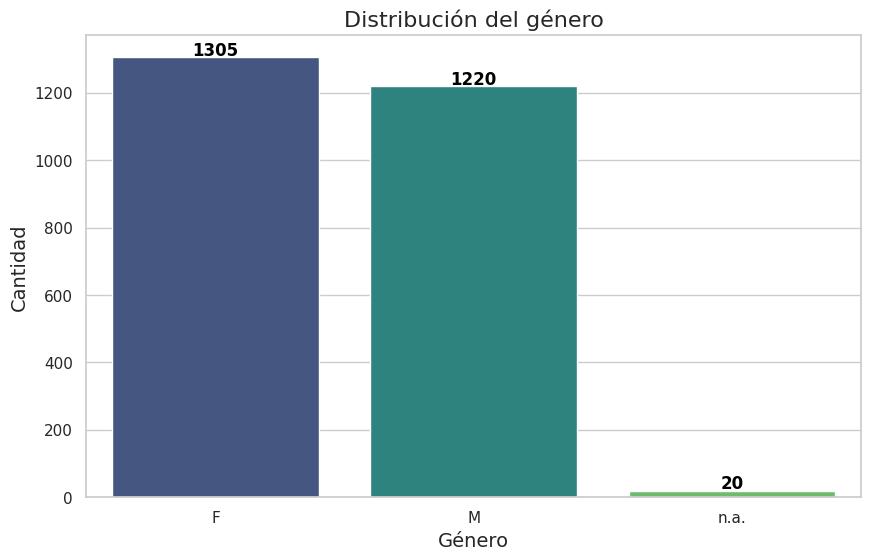

In [45]:
# Obtener conteo de valores únicos de la columna "Sex"
genero_counts = df_concat['Sex'].value_counts()

# Crear una figura
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Crear un gráfico de barras a partir del conteo de valores únicos de la columna "Sex"
ax = sns.barplot(x=genero_counts.index, y=genero_counts.values, palette='viridis')

# Agregar el valor correspondiente a cada barra
for i, v in enumerate(genero_counts.values):
    ax.text(i, v+5, str(v), color='black', ha='center', fontweight='bold', fontsize=12)

# Establecer el título del gráfico y las etiquetas de los ejes
ax.set_title('Distribución del género', fontsize=16)
ax.set_xlabel('Género', fontsize=14)
ax.set_ylabel('Cantidad', fontsize=14)

# Mostrar el gráfico
plt.show()

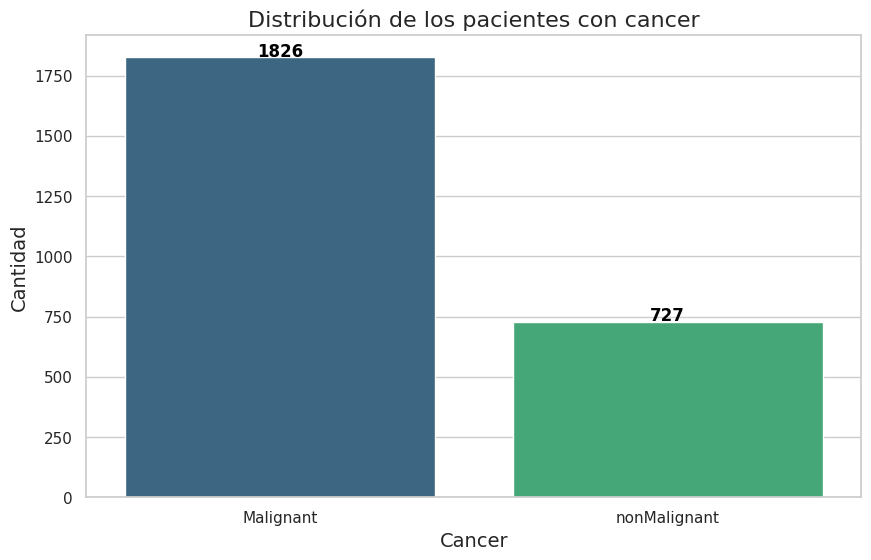

In [46]:
# Obtener conteo de valores únicos de la columna "Sex"
cancer_counts = df_concat['Classification'].value_counts()

# Crear una figura
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Crear un gráfico de barras a partir del conteo de valores únicos de la columna "Sex"
ax = sns.barplot(x=cancer_counts.index, y=cancer_counts.values, palette='viridis')

# Agregar el valor correspondiente a cada barra
for i, v in enumerate(cancer_counts.values):
    ax.text(i, v+5, str(v), color='black', ha='center', fontweight='bold', fontsize=12)

# Establecer el título del gráfico y las etiquetas de los ejes
ax.set_title('Distribución de los pacientes con cancer', fontsize=16)
ax.set_xlabel('Cancer', fontsize=14)
ax.set_ylabel('Cantidad', fontsize=14)

# Mostrar el gráfico
plt.show()

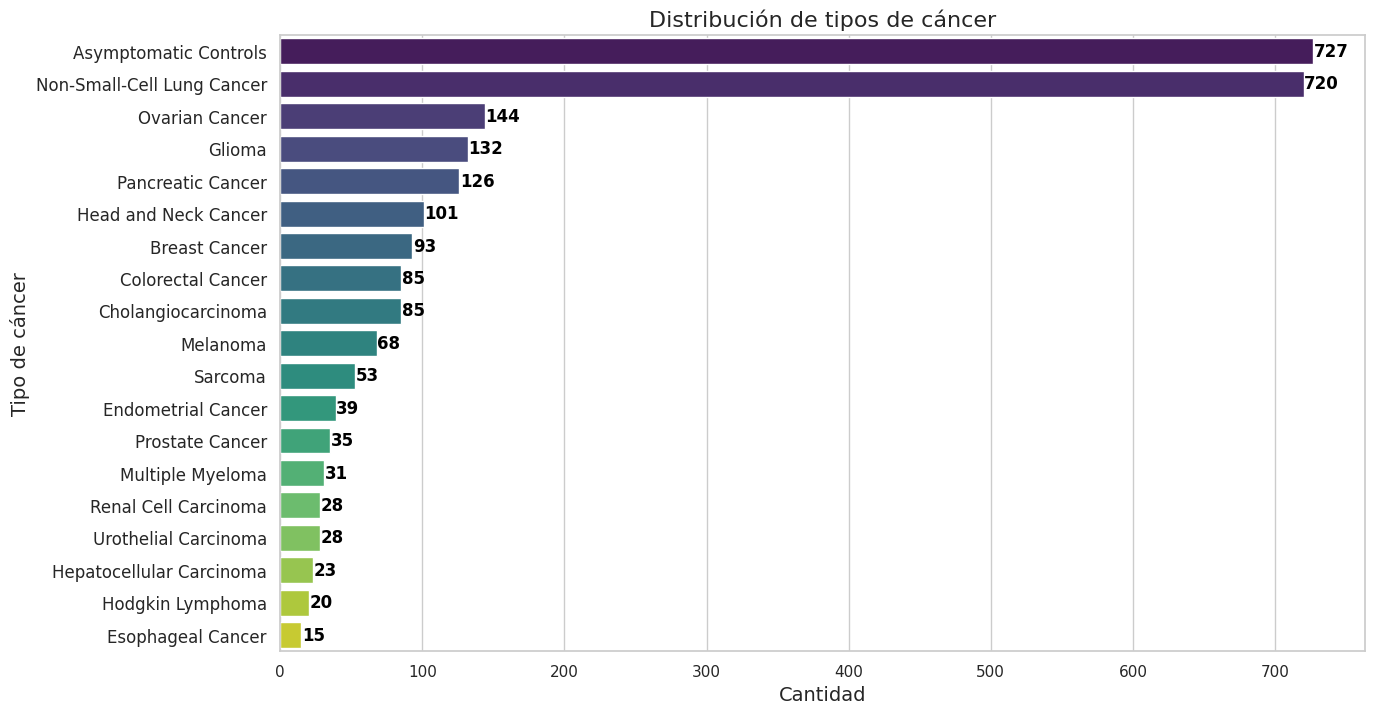

In [47]:

# Obtener conteo de valores únicos de la columna "Type"
type_counts = df_concat['Type'].value_counts()

# Crear una figura
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Crear un gráfico de barras horizontal a partir del conteo de valores únicos de la columna "Type"
ax = sns.barplot(y=type_counts.index, x=type_counts.values, palette='viridis', orient='h')

# Agregar el valor correspondiente a cada barra
for i, v in enumerate(type_counts.values):
    ax.text(v+0.5, i, str(v), color='black', ha='left', va='center', fontweight='bold', fontsize=12)

# Establecer el título del gráfico y las etiquetas de los ejes
ax.set_title('Distribución de tipos de cáncer', fontsize=16)
ax.set_xlabel('Cantidad', fontsize=14)
ax.set_ylabel('Tipo de cáncer', fontsize=14)

# Ajustar la posición de las etiquetas en el eje y para mejorar la legibilidad
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

# Mostrar el gráfico
plt.show()

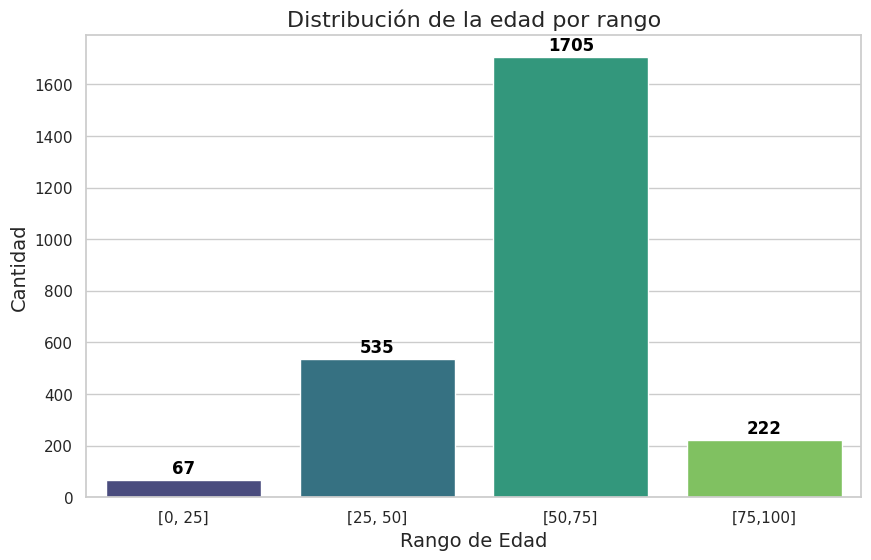

In [48]:
def age_range_label(age):
    age_ranges = {0: '[0, 25]', 1: '[25, 50]', 2:'[50,75]', 3:'[75,100]'}
    return age_ranges[age]

df_concat['Age_Range'] = df_concat['Age_C'].apply(age_range_label)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x='Age_Range', data=df_concat, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, fontweight='bold', color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set_xlabel('Rango de Edad', fontsize=14)
ax.set_ylabel('Cantidad', fontsize=14)
ax.set_title('Distribución de la edad por rango', fontsize=16)

plt.show()

In [49]:
df_concat = pd.concat([df_t, best08_meta])

# resetear el índice
df_concat = df_concat.reset_index(drop=True)
df_concat

,Patient,Classification,Type,Sex,Age,Classification_Malignant,Sex_M,Age_C
0,AMC-Chol-002-TR2072,Malignant,Cholangiocarcinoma,F,61,1,0,2
1,AMC-Chol-003-TR2073,Malignant,Cholangiocarcinoma,F,78,1,0,3
2,AMC-Chol-004-TR2074,Malignant,Cholangiocarcinoma,F,74,1,0,2
3,AMC-Chol-005-TR2075,Malignant,Cholangiocarcinoma,M,79,1,1,3
4,AMC-Chol-006-TR2089,Malignant,Cholangiocarcinoma,M,61,1,1,2
...,...,...,...,...,...,...,...,...
2548,NKI-NSCLC-0470-TR2508,Malignant,Non-Small-Cell Lung Cancer,NaN,66.0,1,0,2
2549,NKI-NSCLC-0649-TR2510,Malignant,Non-Small-Cell Lung Cancer,NaN,71.0,1,0,2
2550,NKI-NSCLC-2676-TR2515,Malignant,Non-Small-Cell Lung Cancer,NaN,64.0,1,0,2
2551,NKI-NSCLC-3147-TR2516,Malignant,Non-Small-Cell Lung Cancer,NaN,63.0,1,0,2


In [50]:
df_concat = df_concat.dropna(subset=["Age", "Sex"], how="any")
df_concat = df_concat.drop(df_concat[(df_concat["Age"] == "n.a.") | (df_concat["Sex"] == "n.a.")].index)
df_concat = df_concat.reset_index(drop=True)
df_concat['Age'] = df_concat['Age'].astype(int)
df_concat

,Patient,Classification,Type,Sex,Age,Classification_Malignant,Sex_M,Age_C
0,AMC-Chol-002-TR2072,Malignant,Cholangiocarcinoma,F,61,1,0,2
1,AMC-Chol-003-TR2073,Malignant,Cholangiocarcinoma,F,78,1,0,3
2,AMC-Chol-004-TR2074,Malignant,Cholangiocarcinoma,F,74,1,0,2
3,AMC-Chol-005-TR2075,Malignant,Cholangiocarcinoma,M,79,1,1,3
4,AMC-Chol-006-TR2089,Malignant,Cholangiocarcinoma,M,61,1,1,2
...,...,...,...,...,...,...,...,...
2513,NKI-NSCLC-2079-TR1897,Malignant,Non-Small-Cell Lung Cancer,M,62,1,1,2
2514,NKI-NSCLC-2121-TR1900,Malignant,Non-Small-Cell Lung Cancer,F,50,1,0,1
2515,NKI-NSCLC-2205-TR1856,Malignant,Non-Small-Cell Lung Cancer,M,75,1,1,2
2516,NKI-NSCLC-2314-TR1854,Malignant,Non-Small-Cell Lung Cancer,M,68,1,1,2


In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df_concat['Type'])

df_concat['Type_encoded'] = le.transform(df_concat['Type'])
df_concat['Type'].value_counts()

Asymptomatic Controls         709
Non-Small-Cell Lung Cancer    709
Ovarian Cancer                144
Glioma                        127
Pancreatic Cancer             125
Head and Neck Cancer          101
Breast Cancer                  93
Colorectal Cancer              85
Cholangiocarcinoma             85
Melanoma                       68
Sarcoma                        53
Endometrial Cancer             39
Prostate Cancer                35
Multiple Myeloma               31
Renal Cell Carcinoma           28
Urothelial Carcinoma           28
Hepatocellular Carcinoma       23
Hodgkin Lymphoma               20
Esophageal Cancer              15
Name: Type, dtype: int64

In [52]:
from tensorflow.keras.utils import to_categorical

one_hot = to_categorical(df_concat['Type_encoded'])
one_hot

2023-05-09 14:31:53.822634: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 14:31:53.902166: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-09 14:31:53.904516: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-09 14:31:53.904525: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [53]:
intvel_df_tpm = intvel_df_tpm.loc[:, intvel_df_tpm.columns.isin(df_concat['Patient'])]
intvel_df_tpm

,Vumc-HD-101-TR922,Vumc-HD-103-TR923,Vumc-HD-108-TR924,Vumc-HD-127-TR925,Vumc-HD-130-TR926,Vumc-HD-142-TR927,Vumc-HD-143-TR928,Vumc-HD-144-TR929,Vumc-HD-145-TR930,Vumc-HD-149-TR932,...,NKI-NSCLC-642-TR1835,NKI-NSCLC-2062-TR1901,NKI-NSCLC-2079-TR1897,NKI-NSCLC-2121-TR1900,NKI-NSCLC-2205-TR1856,NKI-NSCLC-2314-TR1854,Vumc-HD-148-TR931,UMCU-NSAth-1-0145-TR828,UMCU-1-0009-AP-stable-TR942,NKI-NSCLC-2194-TR1855
ENSG00000188976,0.647414,16.831287,9.724761,4.434111,4.496017,0.000000,0.000000,0.000000,2.499577,5.030470,...,2.848716,0.000000,0.000000,0.000000,55.438451,0.000000,0.000000,0.000000,0.0,243.169888
ENSG00000078808,9.885769,17.469572,31.877656,5.046498,3.299089,7.445788,6.759430,7.515273,3.378186,11.197855,...,7.092197,68.518435,47.523577,3.576601,55.208082,42.319415,0.660322,7.758920,0.0,0.000000
ENSG00000160087,6.208001,19.561071,16.870873,5.754359,7.165418,5.660128,2.266930,4.791506,2.838343,7.392320,...,9.704405,1.085130,0.000000,6.797138,13.989332,10.723436,0.000000,42.024422,0.0,0.000000
ENSG00000127054,7.956582,48.617712,31.279374,28.463525,16.631053,2.953574,2.990188,0.560967,1.645674,7.159694,...,35.283628,84.228746,183.278631,132.417216,117.103009,32.641669,0.000000,2.244219,0.0,80.049254
ENSG00000175756,67.226005,224.003801,260.864161,374.919832,186.742415,77.637963,51.824441,55.612087,35.224678,58.380562,...,162.692276,223.265129,578.121812,596.697112,863.490089,1985.709021,0.000000,0.000000,0.0,1082.151394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000129824,0.000000,0.000000,0.000000,0.000000,0.000000,0.506486,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.849632,320.576430,0.000000,323.123259,235.093830,0.000000,109.103308,0.0,247.086703
ENSG00000067048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,30.608337,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
ENSG00000183878,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.169513,0.000000,1.801625,0.460341,0.000000,0.000000,0.0,0.000000
ENSG00000154620,0.000000,0.000000,0.000000,0.000000,1.454081,0.000000,1.226744,0.000000,0.000000,1.818335,...,0.000000,0.000000,146.622905,0.000000,0.000000,43.522225,4.074538,5.984585,0.0,0.000000


In [54]:
intvel_df_tpm = intvel_df_tpm.T

In [55]:
intvel_df_tpm['age'] = intvel_df_tpm.index.map(df_concat.set_index('Patient')['Age_C'])
intvel_df_tpm['sex'] = intvel_df_tpm.index.map(df_concat.set_index('Patient')['Sex_M'])
intvel_df_tpm = intvel_df_tpm.T
intvel_df_tpm

,Vumc-HD-101-TR922,Vumc-HD-103-TR923,Vumc-HD-108-TR924,Vumc-HD-127-TR925,Vumc-HD-130-TR926,Vumc-HD-142-TR927,Vumc-HD-143-TR928,Vumc-HD-144-TR929,Vumc-HD-145-TR930,Vumc-HD-149-TR932,...,NKI-NSCLC-642-TR1835,NKI-NSCLC-2062-TR1901,NKI-NSCLC-2079-TR1897,NKI-NSCLC-2121-TR1900,NKI-NSCLC-2205-TR1856,NKI-NSCLC-2314-TR1854,Vumc-HD-148-TR931,UMCU-NSAth-1-0145-TR828,UMCU-1-0009-AP-stable-TR942,NKI-NSCLC-2194-TR1855
ENSG00000188976,0.647414,16.831287,9.724761,4.434111,4.496017,0.000000,0.000000,0.000000,2.499577,5.030470,...,2.848716,0.000000,0.000000,0.000000,55.438451,0.000000,0.000000,0.000000,0.0,243.169888
ENSG00000078808,9.885769,17.469572,31.877656,5.046498,3.299089,7.445788,6.759430,7.515273,3.378186,11.197855,...,7.092197,68.518435,47.523577,3.576601,55.208082,42.319415,0.660322,7.758920,0.0,0.000000
ENSG00000160087,6.208001,19.561071,16.870873,5.754359,7.165418,5.660128,2.266930,4.791506,2.838343,7.392320,...,9.704405,1.085130,0.000000,6.797138,13.989332,10.723436,0.000000,42.024422,0.0,0.000000
ENSG00000127054,7.956582,48.617712,31.279374,28.463525,16.631053,2.953574,2.990188,0.560967,1.645674,7.159694,...,35.283628,84.228746,183.278631,132.417216,117.103009,32.641669,0.000000,2.244219,0.0,80.049254
ENSG00000175756,67.226005,224.003801,260.864161,374.919832,186.742415,77.637963,51.824441,55.612087,35.224678,58.380562,...,162.692276,223.265129,578.121812,596.697112,863.490089,1985.709021,0.000000,0.000000,0.0,1082.151394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000183878,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.169513,0.000000,1.801625,0.460341,0.000000,0.000000,0.0,0.000000
ENSG00000154620,0.000000,0.000000,0.000000,0.000000,1.454081,0.000000,1.226744,0.000000,0.000000,1.818335,...,0.000000,0.000000,146.622905,0.000000,0.000000,43.522225,4.074538,5.984585,0.0,0.000000
ENSG00000198692,0.000000,0.410663,0.000000,0.274331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,13.778230,0.000000,56.021533,18.404126,0.000000,1.687123,0.0,30.089077
age,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.000000


In [56]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr
from sklearn.feature_selection import SelectKBest, f_classif
import networkx as nx

correlation_matrix, _ = spearmanr(intvel_df_tpm.T)
correlation_threshold = 0.7

high_correlation_matrix = np.abs(correlation_matrix) >= correlation_threshold
np.fill_diagonal(high_correlation_matrix, 0)  

# Creamos un grafo dirigido para poder obtener las submatrices posteriormente
G = nx.Graph(high_correlation_matrix)
subgraphs = list(nx.connected_components(G))

# Convertir los subgrafos a matrices
submatrices = []
genes_originales = []  # Lista para guardar los nombres de los genes originales correspondientes a cada submatriz
for subgraph in subgraphs:
    submatrix = correlation_matrix[np.ix_(list(subgraph), list(subgraph))]

    if submatrix.shape != (1, 1):
        submatrices.append(submatrix)
        genes_originales_submatriz = [intvel_df_tpm.T.columns[i] for i in list(subgraph)]
        genes_originales.append(genes_originales_submatriz)

# Obtener los genes representativos de cada submatriz utilizando la función SelectKBest
genes_representativos = []
for i, submatrix in enumerate(submatrices):
    # Obtenemos un 10% de los genes representativos
    k = round(0.1 * submatrix.shape[0])  
    if k == 0:
        k = 1
    selector = SelectKBest(score_func=f_classif, k=k) 
    selector.fit(submatrix, genes_originales[i])
    indices_genes_representativos = selector.get_support(indices=True)
    genes_representativos.append(indices_genes_representativos)  # Seleccionar los índices de las características más representativas

genes_originales_representativos = []
genes_originales_norepresentativos = []
for i, genes_submatriz in enumerate(genes_representativos):
    genes_originales_submatriz = []
    for gene_index in genes_submatriz:
        genes_originales_submatriz.append(genes_originales[i][gene_index])
    genes_originales_representativos.append(genes_originales_submatriz)
    genes_originales_norepresentativos_submatriz = list(set(genes_originales[i]) - set(genes_originales_submatriz))
    genes_originales_norepresentativos.append(genes_originales_norepresentativos_submatriz)



/home/adrihp06/.local/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
/home/adrihp06/.local/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
/home/adrihp06/.local/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
/home/adrihp06/.local/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
/home/adrihp06/.local/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
/home/adrihp06/.local/lib/python3.9/site-packages/sklearn/feature_selection

In [57]:
genes_originales_norepresentativos

[['ENSG00000072818',
  'ENSG00000117091',
  'ENSG00000117592',
  'ENSG00000189091',
  'ENSG00000059758',
  'ENSG00000110719',
  'ENSG00000114867',
  'ENSG00000095015',
  'ENSG00000149269',
  'ENSG00000173193',
  'ENSG00000113460',
  'ENSG00000169045',
  'ENSG00000155903',
  'ENSG00000085733',
  'ENSG00000110514',
  'ENSG00000139436',
  'ENSG00000105829',
  'ENSG00000182173',
  'ENSG00000123349',
  'ENSG00000198604',
  'ENSG00000133706',
  'ENSG00000188404',
  'ENSG00000160014',
  'ENSG00000196230',
  'ENSG00000100284',
  'ENSG00000112306',
  'ENSG00000066336',
  'ENSG00000126091',
  'ENSG00000074800',
  'ENSG00000183696',
  'ENSG00000134882',
  'ENSG00000088832',
  'ENSG00000115053',
  'ENSG00000090863',
  'ENSG00000182944',
  'ENSG00000102572',
  'ENSG00000100325',
  'ENSG00000139641',
  'ENSG00000120129',
  'ENSG00000077984',
  'ENSG00000131042',
  'ENSG00000086730',
  'ENSG00000227507',
  'ENSG00000163798',
  'ENSG00000088205',
  'ENSG00000265148',
  'ENSG00000111540',
  'ENSG000000

In [58]:
genes_originales_representativos

[['ENSG00000082014',
  'ENSG00000013374',
  'ENSG00000133627',
  'ENSG00000105993',
  'ENSG00000180190',
  'ENSG00000078674',
  'ENSG00000104763',
  'ENSG00000104613',
  'ENSG00000147443',
  'ENSG00000158856',
  'ENSG00000104765',
  'ENSG00000120899',
  'ENSG00000120885',
  'ENSG00000133872',
  'ENSG00000104660',
  'ENSG00000147548',
  'ENSG00000169490',
  'ENSG00000168615',
  'ENSG00000029534',
  'ENSG00000078668',
  'ENSG00000253729',
  'ENSG00000168300',
  'ENSG00000120992',
  'ENSG00000254087',
  'ENSG00000008988',
  'ENSG00000035681',
  'ENSG00000205268',
  'ENSG00000067167',
  'ENSG00000147601',
  'ENSG00000147604',
  'ENSG00000104231',
  'ENSG00000104320',
  'ENSG00000104325',
  'ENSG00000180694',
  'ENSG00000155099',
  'ENSG00000156467',
  'ENSG00000147649',
  'ENSG00000156482',
  'ENSG00000164919',
  'ENSG00000070756',
  'ENSG00000164924',
  'ENSG00000120963',
  'ENSG00000155096',
  'ENSG00000147650',
  'ENSG00000104408',
  'ENSG00000120533',
  'ENSG00000205038',
  'ENSG000001

In [59]:
for genes in genes_originales_norepresentativos:
    intvel_df_tpm = intvel_df_tpm.T.drop(columns=genes).T

In [60]:
intvel_df_tpm

,Vumc-HD-101-TR922,Vumc-HD-103-TR923,Vumc-HD-108-TR924,Vumc-HD-127-TR925,Vumc-HD-130-TR926,Vumc-HD-142-TR927,Vumc-HD-143-TR928,Vumc-HD-144-TR929,Vumc-HD-145-TR930,Vumc-HD-149-TR932,...,NKI-NSCLC-642-TR1835,NKI-NSCLC-2062-TR1901,NKI-NSCLC-2079-TR1897,NKI-NSCLC-2121-TR1900,NKI-NSCLC-2205-TR1856,NKI-NSCLC-2314-TR1854,Vumc-HD-148-TR931,UMCU-NSAth-1-0145-TR828,UMCU-1-0009-AP-stable-TR942,NKI-NSCLC-2194-TR1855
ENSG00000160087,6.208001,19.561071,16.870873,5.754359,7.165418,5.660128,2.266930,4.791506,2.838343,7.392320,...,9.704405,1.085130,0.000000,6.797138,13.989332,10.723436,0.000000,42.024422,0.000000,0.000000
ENSG00000160075,10.203093,24.140400,26.709957,16.270259,12.909014,8.157702,6.534458,10.181618,5.600476,12.107086,...,20.073283,26.717508,14.463179,25.307434,29.403250,12.879360,0.000000,49.587844,0.000000,0.000000
ENSG00000197530,5.359973,8.007546,22.945849,13.530335,7.287820,2.759027,4.760060,1.209269,2.128537,1.763894,...,6.367857,28.481718,39.509166,12.488450,64.256850,42.219165,0.000000,112.237836,0.000000,0.000000
ENSG00000162585,12.000812,22.202657,54.553363,36.616062,25.625484,17.819353,15.483939,10.687564,11.234994,8.660753,...,58.363759,67.125973,93.115564,52.558738,121.693767,114.013297,3.881415,42.756976,382.997606,152.510238
ENSG00000157916,16.204124,55.494565,54.138808,61.552660,35.013439,18.163411,9.919910,5.913843,13.011817,6.208245,...,37.747317,4.748446,43.912879,51.555844,51.013538,46.924936,1.464366,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000165775,12.652653,15.086809,13.604332,11.586069,12.569411,14.130571,11.604657,9.271282,13.241428,6.821065,...,14.632138,3.591529,11.957001,5.399268,9.260289,3.549209,0.000000,26.842140,0.000000,17.407903
ENSG00000155959,3.620400,8.718785,17.778649,6.335230,4.275181,5.237895,2.705086,5.497708,8.179352,7.446400,...,5.054801,0.000000,0.000000,0.000000,0.000000,9.140058,0.000000,0.000000,0.000000,0.000000
ENSG00000124333,36.392463,17.754795,18.502249,3.366869,4.745123,33.650666,32.218926,26.760726,25.536132,30.312413,...,13.936999,6.926273,0.000000,7.375524,0.000000,1.711165,0.000000,0.470592,0.000000,0.000000
age,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [61]:
df_concat

,Patient,Classification,Type,Sex,Age,Classification_Malignant,Sex_M,Age_C,Type_encoded
0,AMC-Chol-002-TR2072,Malignant,Cholangiocarcinoma,F,61,1,0,2,2
1,AMC-Chol-003-TR2073,Malignant,Cholangiocarcinoma,F,78,1,0,3,2
2,AMC-Chol-004-TR2074,Malignant,Cholangiocarcinoma,F,74,1,0,2,2
3,AMC-Chol-005-TR2075,Malignant,Cholangiocarcinoma,M,79,1,1,3,2
4,AMC-Chol-006-TR2089,Malignant,Cholangiocarcinoma,M,61,1,1,2,2
...,...,...,...,...,...,...,...,...,...
2513,NKI-NSCLC-2079-TR1897,Malignant,Non-Small-Cell Lung Cancer,M,62,1,1,2,12
2514,NKI-NSCLC-2121-TR1900,Malignant,Non-Small-Cell Lung Cancer,F,50,1,0,1,12
2515,NKI-NSCLC-2205-TR1856,Malignant,Non-Small-Cell Lung Cancer,M,75,1,1,2,12
2516,NKI-NSCLC-2314-TR1854,Malignant,Non-Small-Cell Lung Cancer,M,68,1,1,2,12


In [62]:
#df.to_csv(DATA_PATH + 'IntVeld2022/meta_dataprep.csv', index=False)
df_concat.to_csv(DATA_PATH + 'data_pro/meta_dataprep_sa_02_corr.csv', index=False)
#intvel_df.to_csv(DATA_PATH + 'IntVeld2022/intveld_dataprep.csv')
intvel_df_tpm.to_csv(DATA_PATH + 'data_pro/intveld_dataprep_tpm_pro_02_corr.csv')
#intvel_df_tpm_corr.to_csv(DATA_PATH + 'IntVeld2022/intveld_dataprep_tpm_pro_corr.csv')
#intvel_df_tpm.T.to_csv(DATA_PATH + 'IntVeld2022/intveld_dataprep_tpm_pro_T.csv')

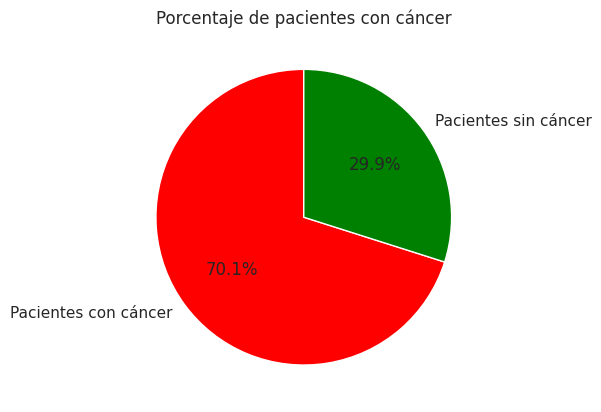

In [63]:
import matplotlib.pyplot as plt

num_cancer = len(df_t[df_t['Classification_Malignant'] == 1])
num_no_cancer = len(df_t[df_t['Classification_Malignant'] == 0])

etiquetas = ['Pacientes con cáncer', 'Pacientes sin cáncer']

colores = ['red', 'green']

plt.pie([num_cancer, num_no_cancer], labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)

plt.title('Porcentaje de pacientes con cáncer')
plt.show()
